# Análisis para estrategia de retención de clientes

Uno de los problemas más comunes que enfrentan los gimnasios es la pérdida de clientes; para prevenir esto, desarrollaremos una estrategia de interacción con el cliente basada en datos analíticos para la cadena de gimnasios Model Fitness.

Nuestra principal misión será poder **predecir la probabilidad de pérdida (para el próximo mes) para cada cliente.** Para esto, usaremos herramientas de predicción de datos.

Además, 

- Elaboraremos retratos de usuarios típicos; seleccionando grupos destacados y describiendo sus características principales.

- Analizaremos los factores que más impactan la pérdida de usuarios.

- Realizaremos recomendaciones para mejorar la atención al cliente como por ejemplo: identificación de grupos objetivo, medidas para reducir la rotación y patrones importantes a destacar respecto a la interacción con los clientes.


**Tabla de contenidos:**

 **1. Análisis exploratorio de datos:**
 
    - Inicialización
    - Carga de datos
    - Evaluación de la calidad de los datos
    
    
 **2. Preprocesamiento de datos:**
 
    - Estandarización de los datos
 
 
 **3. Construcción del modelo:**
 
    - Entrenamiento de modelos
    - Evaluación de métricas


 **4. Clústeres de usuarios**
     
    - Dendrograma
    - Clustering con K-means
 
 **5. Conclusiones y recomendaciones**
    

## Análisis exploratorio de datos (EDA)

Los objetivos de esta  exploración son:
- Evaluar la calidad de los datos y el volumen de preprocesamiento requerido.
- Examinar las distribuciones y las correlaciones mutuas y detectar anomalías, si se presentan.
- Formular hipótesis iniciales de acuerdo con las características y la variable objetivo.

### Inicialización

In [1]:
# Cargamos las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score
import plotly.graph_objects as go
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

### Carga de datos

Model Fitness aportó archivos CSV que contenían los datos sobre cancelación de un mes en concreto e información del mes que lo precedía.

In [2]:
# Cargamos los datos a "gym"
gym = pd.read_csv('/datasets/gym_churn_us.csv')

# Vemos las primeras 5 filas
gym.head()

gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   
3             1   33                     62.669863                   12.0   
4             0   26                    198.362265                    1.0   

   Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
0         3                   0.020398                           0.000000   
1         7                   1.922936                           1.910244   
2         2                   1.859098                           1.736502   
3         2                   3.205633                           3.357215   
4         3                   1.113884                           1.120078   

   Churn  
0      0  
1      0  
2      0  
3      0  
4      0

Vemos las características de los datos:

In [3]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

### Evaluación de la calidad de los datos

#### *¿De qué tamaño es el dataset?*

In [4]:
gym.shape

(4000, 14)

Tenemos los datos para 4000 usuarios y el dataset contempla 14 características para estos las cuales describimos a continuación:

#### *¿Qué características incluye?*


**1. Churn:**

    - Descripción: la cancelación para el mes en cuestión.
    - Tipo de datos: int64.


**DATOS DEL USUARIO EL MES ANTERIOR:**

**2. gender:**

    - Descripción: género del usuario.
    - Tipo de datos: int64.

**3. Near_Location:**

    - Descripción: si el usuario vive o trabaja en el vecindario donde se encuentra el gimnasio.
    - Tipo de datos: int64.
    
**4. Partner:**

    - Descripción: si el usuario es un trabajador de una compañía asociada. 
    
    Nota: el gimnasio tiene empresas asociadas cuyos empleados obtienen descuentos; en esos casos el gimnasio almacena información sobre los empleadores de los clientes.
    
    - Tipo de datos: int64.
    
**5. Promo_friends:**

    - Descripción: si el usuario originalmente se inscribió mediante una oferta "trae a un amigo" (se utilizó el código promocional de un amigo cuando pagaron el primer abono).
   
    - Tipo de datos: int64.
    
**6. Phone:**

    - Descripción: si el usuario aportó el número de teléfono.
    - Tipo de datos: int64.
    
**7. Age:**

    - Descripción: edad del usuario.
    - Tipo de datos: int64.

**8. Lifetime:**

    - Descripción: el tiempo (en meses) desde que el usuario llegó por primera vez al gimnasio.
    - Tipo de datos: int64.
   

**DATOS DEL REGISTRO DE VISITAS/COMPRAS Y DATOS SOBRE EL ESTADO ACTUAL DE LA MEMBRESÍA:**

**9. Contract_period:**

    - Descripción: 1 mes, 3 meses, 6 meses o 1 año.
    - Tipo de datos: int64.
    
**10. Month_to_end_contract:**

    - Descripción: los meses que faltan hasta que expire el contrato.
    - Tipo de datos: float64.
    
**11. Group_visits:**

    - Descripción: si el usuario participa en sesiones grupales.
    - Tipo de datos: int64.
    
**12. Avg_class_frequency_total:**

    - Descripción: frecuencia media de visitas por semana a lo largo de la vida del cliente.
    - Tipo de datos: float64.

**13. Avg_class_frequency_current_month:**

    - Descripción: frecuencia media de visitas por semana durante el mes en curso.
    - Tipo de datos: float64.

**14. Avg_additional_charges_total:**

    - Descripción: cantidad total de dinero gastado en otros servicios del gimnasio como cafetería, productos deportivos, cosméticos, masajes, etc.
    - Tipo de datos: float64.

- **Tenemos solo características numéricas de tipo int64 y float64; por lo tanto, no es necesario realizar una conversión para aplicar los modelos de aprendizaje a futuro.**


- **No tenemos datos ausentes en el dataset.**

**Las siguientes características presentan valores de tipo booleano (False y True representados en ceros y unos respectivamente):**

    - gender
    - Near_Location
    - Partner
    - Promo_friends
    - Phone
    - Group_visits
    - Churn
    
**Características presentan valores temporales expresados en cantidad de meses:**

    - Contract_period
    - Month_to end_contract
    - Lifetime

**Característica representada en cantidad de años:**

    - Age

**Características que expresan frecuencia con decimales:**

    - Avg_frequency_total
    - Avg_class_frequency_current_month

**Caracteristica de cantidad de dinero expresada con decimales:**

    - Avg_additional_charges_total

#### Variable objetivo

Considerando que necesitamos predecir la probabilidad de pérdida para el próximo mes, **nuestra variable objetivo debe ser *Churn***, que corresponde a si el usuario cancela la suscripción en el mes actual. Ya sabemos que esta variable es de tipo *int64*, veamos sus valores:

In [5]:
# Usamos value counts para ver los valores
gym['Churn'].value_counts()

0    2939
1    1061
Name: Churn, dtype: int64

Tenemos ceros y unos los cuales se traducen a valores booleanos False y True respectivamente; es decir, tenemos 1061 cancelaciones de suscripción en el dataset. 

#### Valores promedio y desviación estándar

In [6]:
gym.describe()

gender  Near_Location      Partner  Promo_friends        Phone  \
count  4000.000000    4000.000000  4000.000000    4000.000000  4000.000000   
mean      0.510250       0.845250     0.486750       0.308500     0.903500   
std       0.499957       0.361711     0.499887       0.461932     0.295313   
min       0.000000       0.000000     0.000000       0.000000     0.000000   
25%       0.000000       1.000000     0.000000       0.000000     1.000000   
50%       1.000000       1.000000     0.000000       0.000000     1.000000   
75%       1.000000       1.000000     1.000000       1.000000     1.000000   
max       1.000000       1.000000     1.000000       1.000000     1.000000   

       Contract_period  Group_visits          Age  \
count      4000.000000   4000.000000  4000.000000   
mean          4.681250      0.412250    29.184250   
std           4.549706      0.492301     3.258367   
min           1.000000      0.000000    18.000000   
25%           1.000000      0.000000    27.000000   
50%           1.000000      0.000000    29.000000   
75%           6.000000      1.000000    31.000000   
max          12.000000      1.000000    41.000000   

       Avg_additional_charges_total  Month_to_end_contract     Lifetime  \
count                   4000.000000            4000.000000  4000.000000   
mean                     146.943728               4.322750     3.724750   
std                       96.355602               4.191297     3.749267   
min                        0.148205               1.000000     0.000000   
25%                       68.868830               1.000000     1.000000   
50%                      136.220159               1.000000     3.000000   
75%                      210.949625               6.000000     5.000000   
max                      552.590740              12.000000    31.000000   

       Avg_class_frequency_total  Avg_class_frequency_current_month  \
count                4000.000000                        4000.000000   
mean                    1.879020                           1.767052   
std                     0.972245                           1.052906   
min                     0.000000                           0.000000   
25%                     1.180875                           0.963003   
50%                     1.832768                           1.719574   
75%                     2.536078                           2.510336   
max                     6.023668                           6.146783   

             Churn  
count  4000.000000  
mean      0.265250  
std       0.441521  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

De acuerdo al total para los 4000 usuarios del dataset, podemos concluír lo siguiente mediante las estadísticas:

- **Los datos fueron tomados de forma equitativa tanto para usuarios de sexo masculino y femenino.** La media es de 0.51, es decir, la cantidad de valores de False y True son muy similares; esto queda confirmado por la desviación estándar de 0.5.
- La media de la la ubicación es 0.84, mucho más cercana a True, por lo tanto **existen más usuarios que viven cerca del gimnasio.**
- En cuanto a la pertenencia a compañías afiliadas, vemos que la proporción es bastante similar, al igual que el género.
- Existen **más usuarios que llegan de forma individual** de acuerdo a lo que indica la media de "promo friends".
- **La gran mayoría aporta su número de teléfono al momento de inscribirse.**
- El **periodo medio de contrato oscila entre los 4 a 5 meses.**
- Si bien la mayoría no participa de sesiones grupales, existe un número considerable de personas que si lo hacen.
- La edad que más se repite entre los usuarios es la 29 años aproximadamente. La desviación indica que el **rango etario más popular va entre los 26 y 32 años.** La edad mínima es de 18 años y la máxima de 41 años.
- La media de **gastos adicionales** en el gimnasio es de 147 aprox. La desviación de casi 100 nos indica que los rangos promedio de gastos van **entre los 50 y 250 aproximadamente.**
- La media de **meses restantes hasta finalizar contrato es de 4 meses.**
- El tiempo medio que llevan en el gimnasio nuestros clientes es de 3 meses y medio. Podemos resaltar un caso que ya lleva 31 meses asistiendo.
- La **frecuencia media** que tienen nuestros usuarios desde que están inscritos es de **2 visitas por semana**; y si consideramos el mes actual, la media de visitas por semana disminuye levemente.
- De los 4000 usuarios, **gran parte sigue inscrito en el gimnasio pero hay un número considerable de usuarios que lo han abandonado.**

**Veamos si existen diferencias relevantes a comentar de acuerdo a los usuarios que han cancelado la suscripción y quienes no.**

In [7]:
# Agrupamos por churn y calculamos las medias de las características
gym.groupby('Churn').agg('mean')

gender  Near_Location   Partner  Promo_friends     Phone  \
Churn                                                               
0      0.510037       0.873086  0.534195       0.353522  0.903709   
1      0.510839       0.768143  0.355325       0.183789  0.902922   

       Contract_period  Group_visits        Age  Avg_additional_charges_total  \
Churn                                                                           
0             5.747193      0.464103  29.976523                    158.445715   
1             1.728558      0.268615  26.989632                    115.082899   

       Month_to_end_contract  Lifetime  Avg_class_frequency_total  \
Churn                                                               
0                   5.283089  4.711807                   2.024876   
1                   1.662582  0.990575                   1.474995   

       Avg_class_frequency_current_month  
Churn                                     
0                               2.027882  
1                               1.044546

- Las diferencias más considerables para las características de tipo booleanas se ven en "Partner", donde **quienes cancelan suscripción usualmente no pertenecen a compañías asociadas**; en "Promo friends", donde hay una **mayor retención para quienes llegan a través de un amigo**; y "Group visits", en la que **más usuarios renuncian cuando realizan actividades de forma individual.**


- Las compras medias adicionales por usuario son más bajas en los que dejaron el gimnasio. Posiblemente no se sintieron tan atraídos por los productos que se ofrecen.


- Es más probable que cancelen aquellos usuarios que solo les quede un par de meses de contrato.


- Gran parte de los usuarios que cancela, solo estuvieron un mes; y la asistencia es más baja, promediando solo una vez por semana.

#### Distribución de las características de tipo booleanas de acuerdo a Churn

Hemos analizado las características por medio de las estadísticas, pero veamos ahora estos valores de forma gráfica. Trazaremos histogramas para aquellos usuarios que cancelaron la suscripción y para los que se mantienen.

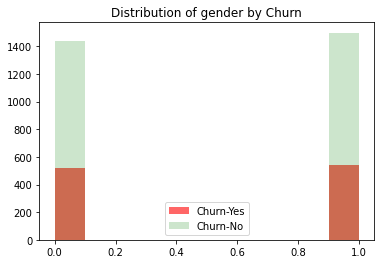

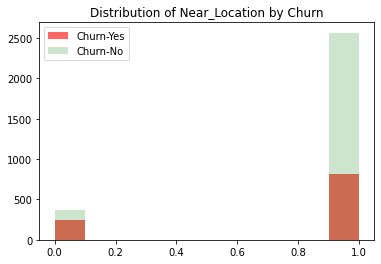

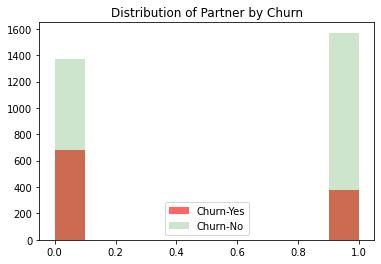

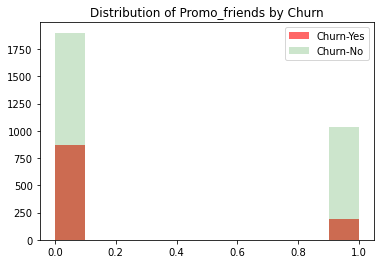

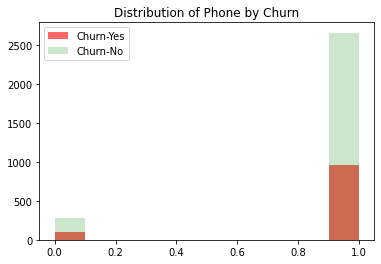

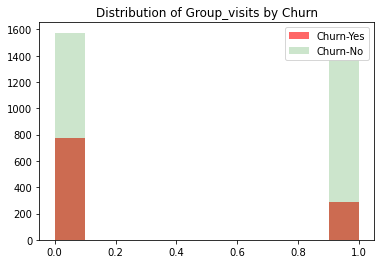

In [8]:
# Creamos una lista de las columnas a usar
boolean_cols = ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Group_visits']

# Creamos un ciclo for para generar cada gráfico
for col in boolean_cols:
    plt.hist(gym.query('Churn == 1')[col], alpha= 0.6, label='Churn-Yes', color='red')
    plt.hist(gym.query('Churn == 0')[col], alpha= 0.2, label='Churn-No', color='green')
    plt.title(f'Distribution of {col} by Churn')
    plt.legend()
    plt.show()

**Conclusiones y conjeturas para las características booleanas relacionadas a la cancelación de suscripciones:**

*Distribución de acuerdo al género:*

- No tenemos información de la asociación de cada sexo a False o True, pero la distribución es bastante similar: la cantidad de usuarios para cada sexo no difiere mucho y la proporción de quienes han cancelado la suscripción también es parecida. 

- Podemos concluir que **el género no es un factor importante a observar de acuerdo a las tasas de cancelación similares**; esto queda confirmado con la media y desviación estándar que demuestran que no hay mayor inclinación hacia algún género.

*Distribución de acuerdo a la cercanía con el gimnasio:*

- La cantidad de usuarios que viven cerca superan aproximadamente en 4 veces a los que viven lejos (consideramos True como "Si, vive cerca" y False como "No vive cerca").

- La proporción de cancelaciones es más alta para quienes viven lejos. Mientras que para los que viven cerca solo una cuarta parte ha cancelado la suscripción, para quienes viven cerca esa cuarta parte del total es la que se mantiene. De acuerdo a esta observación, podemos determinar que **la cercanía sí es un factor importante para los clientes.** 

*Distribución de acuerdo a si el usuario pertenece a una compañía asociada:*

- La distribución de usuarios es similar para quienes pertenecen y no a una compañía asociada. Esto se confirma con la media y desviación estándar cercana a 0.5.

- Para los que pertenecen a compañías asociadas, es más probable que se mantengan en el gimnasio (seguramente por los beneficios que obtienen), ya que superan por 4 veces la cantidad de usuarios que han cancelado la suscripción; mientras tanto, quienes no pertenecen a compañías asociadas, los usuarios que se mantienen solo superan en el doble a los que se han marchado. 

**En síntesis, el que pertenezcan a una compañía asociada puede duplicar la capacidad de retención de los usuarios.**

*Distribución de acuerdo a promoción de inscripción a través de un amigo:*

- La cantidad de usuarios que se inscriben de forma individual es casi el doble de quienes lo hacen a través de un amigo.

- La tasa de retención para quienes llegan por un amigo es mucho mayor. Los clientes que cancelan su suscripción y que llegan por un amigo solo representan la cuarta parte; mientras tanto, para los que llegan de forma individual, la probabilidad de cancelar la suscripción aumenta al doble. 

**La suscripción a través de un amigo es un factor importante ya que puede aumentar al doble la retención de los usuarios.**


*Distribución de acuerdo a si el usuario aportó su número telefónico:*

- Menos de 400 usuarios no aportaron su número telefónico; de esas, casi el 3/4 se mantiene en el gimnasio. Para quienes si aportaron su número, la proporción de cancelaciones es similar al caso anterior; por lo tanto, podemos suponer que **el que hayan aportado o no su número telefónico no tiene mayor influencia en la cancelación.**

*Distribución de acuerdo a si participa de sesiones grupales en el gimnasio:*

- La cantidad de usuarios es solo un poco superior para quienes no participan de sesiones grupales. A simple vista se puede ver una mejor retención de los usuarios que si participan de estas sesiones, con una retención casi 4 veces mayor a la cantidad de usuarios que cancelan.

- Para los usuarios que realizan actividades de forma individual, la tasa de cancelación aumenta al doble; por lo tanto, **el que participen en sesiones grupales si es un factor relevante para retener usuarios.**

#### Distribución de las características de tipo temporales de acuerdo a Churn

*Nota: Las características presentan valores temporales expresados en cantidad de meses.*


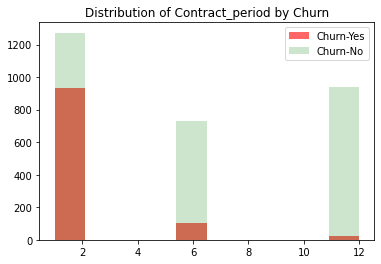

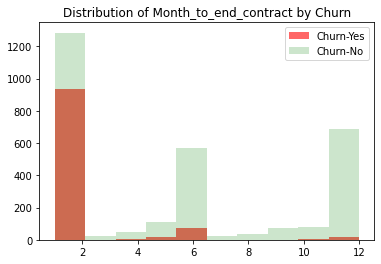

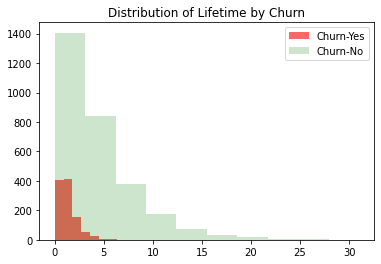

In [9]:
# Creamos una lista de las columnas a emplear
time_cols = ['Contract_period', 'Month_to_end_contract', 'Lifetime']

# Creamos un ciclo for para generar cada gráfico
for col in time_cols:
    plt.hist(gym.query('Churn == 1')[col], alpha= 0.6, label='Churn-Yes', color='red')
    plt.hist(gym.query('Churn == 0')[col], alpha= 0.2, label='Churn-No', color='green')
    plt.title(f'Distribution of {col} by Churn')
    plt.legend()
    plt.show()

Comprobaremos los valores de los periodos de contrato del primer gráfico para verificar los valores:

In [10]:
# Valores de periodo de contrato
gym['Contract_period'].value_counts()

1     2207
12     960
6      833
Name: Contract_period, dtype: int64

**Conclusiones y conjeturas para las características temporales relacionadas a la cancelación de suscripciones:**

*Distribución de acuerdo al periodo de contrato:*

- Gran parte de los usuarios prefiere contratar por solo un mes pero la tasa de cancelación es bastante alta, en la que solo se logra retener a un poco más de la mitad de usuarios en este tipo de contrato.
- Para quienes contratan a 6 y 12 meses la tasa de cancelación es baja, siendo la menor para quienes contratan el servicio por 1 año. Esto demuestra que los usuarios se sienten más comprometidos al establecer contratos de mayor tiempo, por lo tanto, **el periodo de contrato es una característica importante que puede influir considerablemente en la tasa de cancelación.**

*Distribución de acuerdo a los meses que faltan para que expire el contrato:*

- Esta característica es similar a la vista anteriormente, en donde destacan los valores de 1, 6 y 12 meses, pero también nos da información acerca de los meses intermedios. Por ejemplo, podemos notar que son pocos los usuarios que cancelan su suscripción antes de cumplir los periodos establecidos de contrato. 

**No existen factores relevantes que causen la salida repentina de un usuario, normalmente esperan al vencimiento del contrato.**

*Distribución del tiempo (en meses) desde que el usuario llegó al gimnasio:*

- Gran parte de los usuarios no lleva más de un año en el gimnasio. La media de tiempo oscila entre 3 y 4 meses y las estadísticas vistas con el método "describe" confirman que el 75% de los usuarios no lleva más 5 meses.
- La relación de proporción entre usuarios que cancela o no su suscripción no presenta patrones distintos. Solo hay un muy leve aumento de cancelación hacia el segundo mes; y posterior al sexto mes, las cancelaciones son casi nulas.

**El tiempo de vida de los usuarios en el gimnasio viene a confirmar que los primeros 3 meses son cruciales para fidelizar y hacer que permanezcan más tiempo.**

#### Distribución de acuerdo a le edad de los usuarios

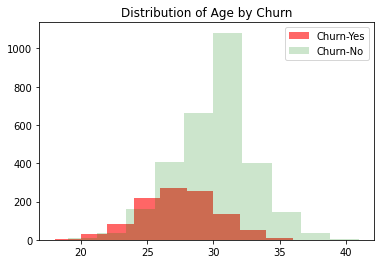

In [11]:
# Distribución de la edad para los usuarios
plt.hist(gym.query('Churn == 1')['Age'], alpha= 0.6, label='Churn-Yes', color='red')
plt.hist(gym.query('Churn == 0')['Age'], alpha= 0.2, label='Churn-No', color='green')
plt.title(f'Distribution of Age by Churn')
plt.legend()
plt.show()

**Conclusiones y conjeturas de acuerdo a la edad:**

- Gran parte de los usuarios se concentra entre los 25 y 35 años.
- La tasa de cancelación es mayor bajo los 26 años, esto se puede deber a la inestabilidad económica a una edad más temprana.
- La cancelación disminuye drásticamente luego de los 30 años. 

**Los usuarios sobre 30 años muestran mayor fidelidad posiblemente por una mejor situación tanto a nivel económico como emocional.**

#### Distribución de las características de frecuencia de acuerdo a Churn

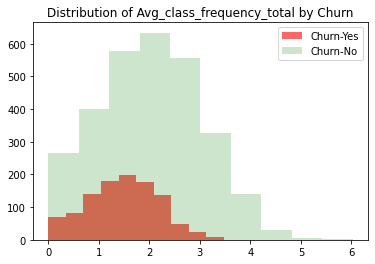

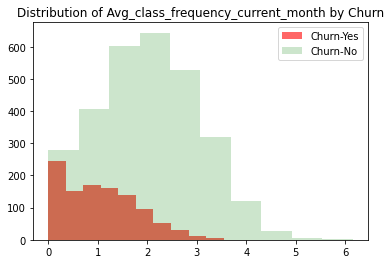

In [12]:
# Creamos una lista de las columnas a emplear
freq_cols = ['Avg_class_frequency_total', 'Avg_class_frequency_current_month']

# Creamos un ciclo for para generar cada gráfico
for col in freq_cols:
    plt.hist(gym.query('Churn == 1')[col], alpha= 0.6, label='Churn-Yes', color='red')
    plt.hist(gym.query('Churn == 0')[col], alpha= 0.2, label='Churn-No', color='green')
    plt.title(f'Distribution of {col} by Churn')
    plt.legend()
    plt.show()

**Conclusiones y conjeturas de acuerdo a la frecuencia de uso del gimnasio:**

*Distribución de la frecuencia media de visitas por semana a lo largo de la vida del cliente.*

- La cantidad de días que van al gimnasio los usuarios es levemente mayor para quienes permanecen suscritos pero es una diferencia un tanto despreciable. El grueso de usuarios va entre 1 y 2 días por semana al gimnasio; **para quienes van más de 3 días presentan una muy baja tasa de cancelación.**

*Distribución de la frecuencia media de visitas por semana durante el mes en curso.*

- De los usuarios que no visitaron el gimnasio durante la semana en el mes actual, casi el 50% canceló su suscripción. Los que logran ir al menos una vez reducen la posibilidad de abandono a la mitad y ya para los que han ido más de dos veces se reduce el riesgo de forma considerable.

**Motivar la frecuencia de ida al gimnasio al menos dos veces por semana puede reducir el riesgo de abandono. Quienes presentan solo una visita por semana en el mes actual, presentan un riesgo de abandonar en el futuro próximo.**

#### Distribución de las ganancias adicionales de acuerdo a Churn

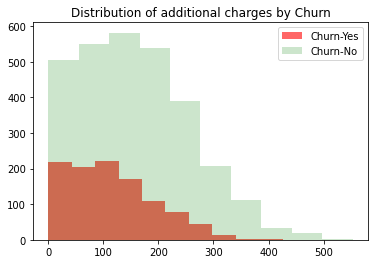

In [13]:
# Distribución de las ganancias extras
plt.hist(gym.query('Churn == 1')['Avg_additional_charges_total'], alpha= 0.6, label='Churn-Yes', color='red')
plt.hist(gym.query('Churn == 0')['Avg_additional_charges_total'], alpha= 0.2, label='Churn-No', color='green')
plt.title(f'Distribution of additional charges by Churn')
plt.legend()
plt.show()

**Conclusiones y conjeturas para el promedio de gasto adicional por usuario:**

- Gran parte de los usuarios que abandonaron el gimnasio tenían gastos entre 0 y 150 en promedio, mientras que para los que aún se mantienen, la mayor cantidad de usuarios mantiene un gasto entre 0 y 200. 
- De los usuarios activos, al menos 200 de ellos mantienen un gasto en torno a los 300; y sigue disminuyendo considerablemente el número de usuarios que realizan gastos extras elevados.

**El patrón de gasto es similar para usuarios que cancelan la suscripción como para quienes se mantienen, por lo tanto, consideramos que no es una característica crucial que afecte la tasa de cancelación.**

#### Correlación entre las variables

Ya que tenemos muchas características, es necesario observar cuales tienen una mayor relevancia sobre la cancelación. Para esto, emplearemos una matriz de correlación y estudiaremos las implicancias de una sobre otra.

<AxesSubplot:title={'center':'Correlación de características'}>

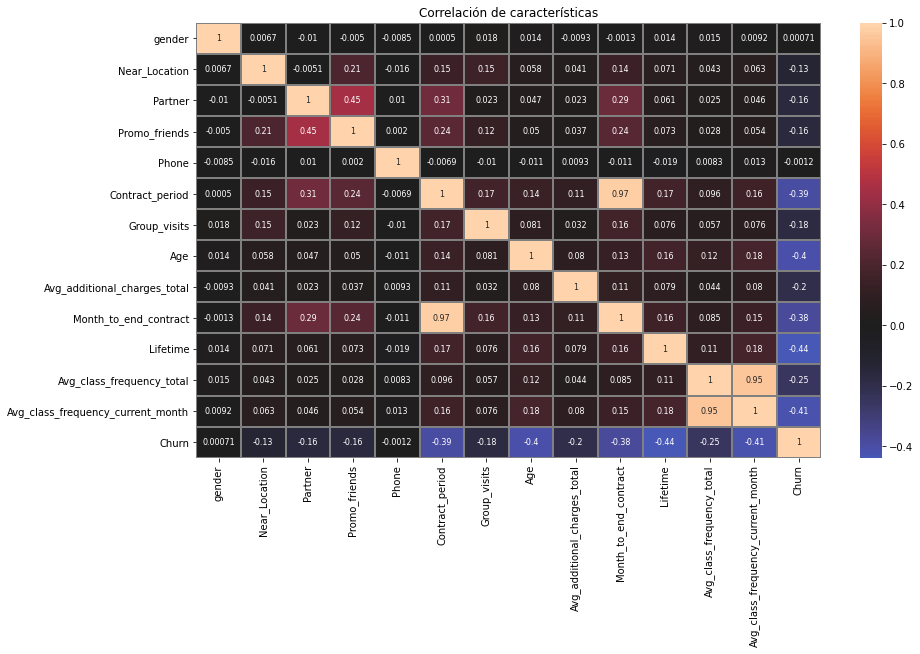

In [14]:
# Creamos una matriz de correlación y la graficamos usando un mapa de calor
plt.figure(figsize=(14,8))
plt.title('Correlación de características')
sns.heatmap(gym.corr(), annot=True, annot_kws={"size": 8}, linewidths=1, linecolor='gray', center=0) 

*Nota: Centramos en el valor 0 para diferenciar en colores si la relación es positiva o negativa. Mientras más ennegrecido, más nula es la relación entre las variables; el tono pastel más fuerte indica que están fuertemente relacionadas de forma positiva; mientras que el azul, indica que hay una relación negativa.*

**Conclusiones y conjeturas a partir de la matriz de correlación:**

- Dejando de lado a "Churn", **gran parte de las variables tienen una relación casi nula**; la relación positiva que destaca más es entre "Partner" y "Promo friends", pero no es lo suficientemente fuerte (0.45). **Es probable que quienes lleguen por invitación de un amigo al gimnasio, además sean compañeros de trabajo en una empresa vinculada al gimnasio.**


- Otras relaciones más débiles se pueden observar entre "Partner" y "Contractperiod" (0.31), la cual se puede deber a que se incentiven promociones especiales por cierto periodo de contrato; "Promo friends" y "Contract period", por la misma razón anterior y estar relacionado de igual modo a "Partner"; Y "Promo friends" y "Near Location", posiblemente por invitar a amigos que vivan cerca del gimnasio u que sean colegas que trabajan cerca del gimnasio.


- Omitiremos las relaciones positivas altas de "month to end contract" - "contract period" y "avg class frequency total" - "avg class frequency current month" por tratarse de la misma característica pero en distintas proporciones.


*Relación de las características respecto a Churn:*

- La relación más alta de churn es con "lifetime" (-0.44), esto quiere decir que **mientras menos tiempo lleven en el gimnasio es más probable que cancelen la suscripción.**


- Otra relación importante es la del promedio de sesiones en el mes actual (0.41). **Si bajan las sesiones en el mes, existe la probabilidad de que el usuario este pronto a retirarse.**


- La edad tiene un factor de correlación de 0.4, como también lo vimos en el histograma, **luego de los 29 años disminuyen considerablemente las posibilidades de renuncia.**


- El periodo de contrato nos indica el nivel de convencimiento y confianza del usuario con el gimnasio, por lo tanto **es muy probable que aquellos que tengan un contrato a corto plazo terminen saliendo antes que quienes lo han hecho a largo.**

#### Relación con la variable objetivo

Veamos la cantidad de usuarios para las características más críticas que observamos en Churn:

*Lifetime:*

In [15]:
# Hacemos un value counts y normalizamos los valores
gym[['Churn', 'Lifetime']].value_counts(normalize=True).sort_values(ascending=False).head(10)

Churn  Lifetime
0      2           0.11325
       3           0.11000
       1           0.10725
1      1           0.10350
       0           0.10075
0      4           0.09000
       5           0.06625
       6           0.05400
       7           0.04175
1      2           0.03925
dtype: float64

- Un 10% de los usuarios totales canceló la suscripción sin haber cumplido un mes y otro 10% lo hizo en el primero. 
- Los usuarios que no se han retirado en sus 3 primeros meses alcanzan un total del 30% de usuarios totales.

**Con esto queda claro que al menos el 50% de los usuarios son relativamente nuevos, de los cuales un poco menos de la mitad han abandonado el gimnasio.**

*Avg class frequency current month:*

In [16]:
# Hacemos un value counts y normalizamos los valores
gym[['Churn', 'Avg_class_frequency_current_month']].value_counts(normalize=True).sort_values(ascending=False).head(5)

Churn  Avg_class_frequency_current_month
1      0.000000                             0.03350
0      0.000000                             0.01175
       1.899198                             0.00025
       0.032348                             0.00025
       0.073276                             0.00025
dtype: float64

- Respecto a estos datos solo podemos destacar a aquellos usuarios que no han ido al gimnasio en el mes (la porción de 0.00025 representa a solo 1 usuario del total). **De 4000 usuarios, un 1,17% no ha ido al gimnasio en el mes actual pero no ha renunciado; mientras que un 3.35% no ha ido pero si ha renunciado.** Hay más posibilidades de que aquellos que no hayan ido al gimnasio en el mes actual, renuncien.

*Age:*

In [17]:
# Hacemos un value counts y normalizamos los valores
gym[['Churn', 'Age']].value_counts(normalize=True).sort_values(ascending=False).head(10)

Churn  Age
0      31     0.09450
       30     0.09400
       29     0.08725
       32     0.08200
       28     0.07775
       27     0.05975
       33     0.05900
       26     0.04175
       34     0.04150
1      27     0.03475
dtype: float64

- La proporción más grande de usuarios corresponde a quienes no han cancelado su suscripción y pertenecen al rango de 26 a 34 años. Cerca del 70% del total de usuarios se mantienen suscritos y contemplan este rango. 

*Contract period:*

In [18]:
# Hacemos un value counts y normalizamos los valores
gym[['Churn', 'Contract_period']].value_counts(normalize=True).sort_values(ascending=False)

Churn  Contract_period
0      1                  0.31825
       12                 0.23425
1      1                  0.23350
0      6                  0.18225
1      6                  0.02600
       12                 0.00575
dtype: float64

- Poco más del 70% de los usuarios no han cancelado la suscripción y **el tiempo de contrato más popular es el de 1 mes (32%) seguido del de 12 meses con un 23%.**

- **Para quienes han renunciado, un 23% tenía contrato de solo un mes**; esto es menor que la cantidad de usuarios con el mismo contrato pero que si se mantienen.

**Hasta el momento solo hemos visto las relaciones lineales, así que mostraremos gráficos emparejados de las características que muestran una mayor correlación con la variable objetivo para visualizar de forma más clara la presencia de sesgos y confirmar las conjeturas hechas previamente.**

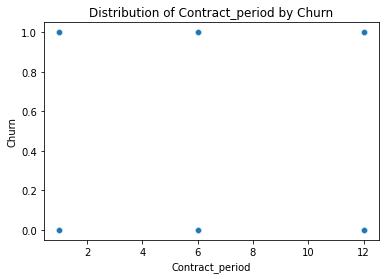

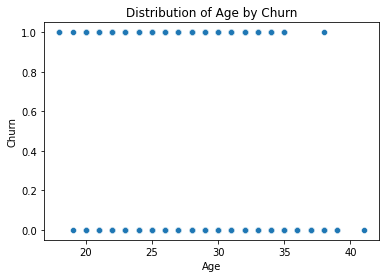

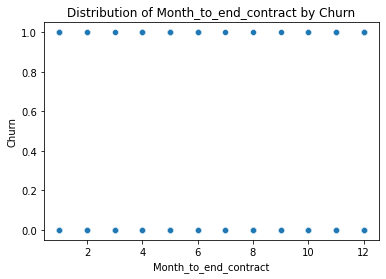

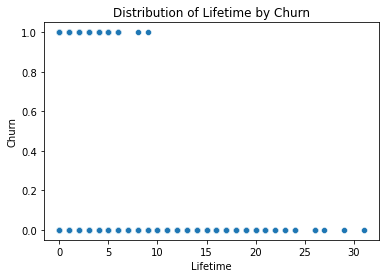

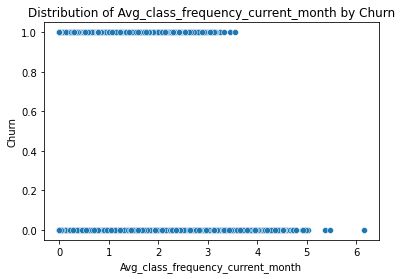

In [19]:
# Lista de las columnas de mayor correlación con Churn
corr_top = ['Contract_period', 'Age', 'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_current_month']
# Creamos un ciclo por para generar cada gráfico de la lista
for col in corr_top:
    sns.scatterplot(x=gym[col], y=gym['Churn'])
    plt.title(f'Distribution of {col} by Churn')
    plt.show()

La distribución muestra más diferencias para los dos últimos gráficos donde se compara *Churn* con *Lifetime* y *Avg class frequency current month*.

- De acuerdo al tiempo del ciclo de vida, **los usuarios que cancelan no duran más de 10 meses en el gimnasio.** Es probable que sobre ese tiempo las probabilidades de salida sean muy bajas.
- La frecuencia de visitas semanales en el mes actual es más baja en quienes se retiran, no superando en ninguna ocasión las 4 visitas. 

Otro punto a destacar es para *Age* donde se muestra claramente que sobre los 35 años es muy extraño que cancelen la suscripción.

### Conclusiones del Análisis Exploratorio de Datos

Tenemos un dataset de 4000 registros (usuarios) y 14 características de estos relacionadas a datos personales del usuario, registro de visitas y cancelación de suscripción.

Con el objetivo de prevenir la pérdida de usuarios, se analizan las características para elaborar un modelo de predicción de la probabilidad de pérdida de cada cliente para el mes siguiente. Este modelo lo usará el departamento administrativo correspondiente para desarrollar estrategias de interacción y así retener y generar valor para la cadena de gimnasios.


**Respecto a la exploración de datos en el archivo csv proporcionado, podemos señalar lo siguiente:**

- Siete columnas presentan valores de ceros y unos. Estas las interpretamos como valores booleanos True y False, asignados a 1 y 0 respectivamente. Podemos interpretar correctamente todas estas variables menos la de género del usuario, la cual no representa mayor problema ya que sus datos son muy similares y no muestran mayor sesgo.

- Tenemos tres columnas de atributos temporales expresado en cantidad de meses. Dos corresponden a periodos de contrato (por lo tanto son similares entre si) y otra al tiempo de vida total.

- Dos columnas expresan frecuencia de visitas por semana; una en el mes actual y otra durante todo el tiempo del usuario en el gimnasio, esto genera que ambas tengan una alta correlación.

- Las columnas restantes corresponden a la edad y promedio de compras adicionales en el gimnasio.


**Respecto a la variable objetivo:**

*Churn* corresponde a la variable que necesitamos predecir. Esta muestra si el cliente cancela o no la suscripción. Actualmente, 1/4 de los usuarios ha renunciado.


**Conclusiones a destacar respecto a las cantidades:**

- Hay más usuarios que viven (o trabajan) en las cercanías del gimnasio.
- Más usuarios llegan de forma individual y no mediante invitación de amigos.
- El periodo medio de contrato oscila entre los 4 y 5 meses.
- Existe un número considerable de usuarios que aprovechan las sesiones grupales pero la gran mayoría no lo hace.
- El rango de edad que presenta más adherentes es el de 26 a los 32 años.
- Los gastos adicionales en el gimnasio van entre los 50 y 250 aproximadamente.
- El tiempo medio que llevan los clientes en el gimnasio es de 3 meses y medio aproximadamente.
- La frecuencia media es de 2 visitas por semana.

**Conclusiones de acuerdo a las diferencias de usuarios que cancelan la suscripción y quienes no:**

- Quienes cancelan usualmente no pertenecen a compañías asociadas al gimnasio.
- La retención es mayor para aquellos usuarios que llegan a través de un amigo.
- Más usuarios renuncian cuando realizan actividades de forma individual.
- El monto de compras adicionales es más bajo en quienes han dejado el gimnasio.
- Es más probable que renuncien aquellos usuarios que les quedan pocos meses de contrato.
- La asistencia de quienes cancelan es apenas de una vez por semana.
- Gran parte de los que renuncian, están solo un mes inscritos.

**Conjeturas respecto a la distribución de usuarios de acuerdo a la cancelación:**

- El género no es relevante ya que tienen tasas de cancelación muy similares.
- La cercanía con el gimnasio es un factor relevante.
- Que el usuario pertenezca a una compañía asociada puede duplicar la retención. Lo mismo aplica para si se inscriben con la promoción de invitación de un amigo.
- El que hayan aportado su número telefónico no tiene mayor relevancia en la cancelación.
- El que participen en sesiones grupales es un factor relevante para retener usuarios.
- Mientras más extensa sea la duración del contrato, es menos probable que renuncien.
- De acuerdo al total de meses que permanecen los usuarios, los primeros tres meses son de vital importancia para fidelizar, ya que hasta este punto se producen muchas pérdidas de clientes.
- Los usuarios sobre 30 años demuestran un mayor compromiso con el gimnasio.
- Quienes frecuentan más de 3 veces por semana, presentan una menor tasa de cancelación.

**Respecto a la correlación entre las características:**

- Gran parte de las características tienen una correlación casi nula.
- La correlación más alta es para el tiempo de vida en el gimnasio; mientras menos tiempo lleven, es más probable que renuncien.
- Si disminuyen las sesiones en el mes, aumenta la probabilidad de renuncia.
- Luego de los 29 años disminuye considerablemente la probabilidad de que dejen el gimnasio.
- Es probable que aquellos que han hecho contrato a corto plazo, no lo extiendan y terminen saliendo.

**Conjeturas de acuerdo a gráficos emparejados Característica-Variable objetivo:**

- Los usuarios que cancelan la suscripción no duran más de 10 meses en el gimnasio.
- Quienes se retiran, en su último mes no cumplen más de 3 sesiones por semana.
- Sobre los 35 años es muy poco probable que cancelen las visitas al gimnasio.

## Preprocesamiento de datos

Gracias al análisis exploratorio de los datos, ya podemos hacernos una idea de las modificaciones que necesita nuestro dataset antes de aplicar los modelos de predicción.


Algunas consideraciones del preprocesamiento:
- Nuestros datos no presentan valores ausentes.
- De acuerdo a los valores medios, desviaciones y gráficos de distribución vistos, no existen valores atípicos considerables en alguna de las características.
- Nuestras características ya se presentan en codificación binaria por lo tanto no es necesario transformarlas.

**Necesitaremos estandarizar los datos si queremos aplicar modelos de regresión lineal o clustering. Para esto dividiremos los datos en conjuntos de entrenamiento y validación.**

### Estandarización de los datos

Ya que tenemos características independientes respecto al tiempo y necesitamos generar una predicción solo para el mes siguiente, usaremos la **división aleatoria** para probar el modelo en datos históricos. Además, usaremos una segmentación para el entrenamiento/validación de 80/20.

In [20]:
# dividimos los datos en características (matriz X) y una variable objetivo (y)
X = gym.drop(columns = ['Churn'])
y = gym['Churn']

# dividimos los datos en conjuntos de entrenamiento y prueba 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200)

Ya tenemos los datos segmentados en conjuntos de entrenamiento y validación. Ahora, es necesario estandarizar los datos aplicando el método StandardScaler. 

Estandarizamos los datos de prueba y almacenamos la matriz con los valores de las características en la variable que denominaremos: X_test_st.

Esto lo realizamos por dos motivos:
- No sabemos la futura distribución de valores de nuestras características.
- Si las validaciones en el conjunto de validación son demasiado diferentes de como eran en el entrenamiento, el modelo no funcionará bien.

In [21]:
# Creamos un objeto StandardScaler y lo aplicamos al conjunto de entrenamiento 
scaler = StandardScaler()
# entrenamos el scaler y transformamos la matriz para el conjunto de entrenamiento
X_train_st = scaler.fit_transform(X_train) 

# Vemos los 5 primeros elementos de la matriz con los valores estandarizados
X_train_st[:5]

array([[ 0.96257481,  0.42265494, -0.97469506, -0.66734383,  0.33851768,
        -0.80688168, -0.83793058, -1.89007799,  0.71340884, -0.78950856,
         0.06409946, -0.62401786, -1.1213413 ],
       [-1.03888029,  0.42265494, -0.97469506,  1.49847793,  0.33851768,
         0.29213142, -0.83793058,  1.46819495, -0.36089207,  0.40716982,
        -0.19820013, -0.14421006,  0.01531436],
       [ 0.96257481,  0.42265494,  1.0259619 ,  1.49847793,  0.33851768,
         0.29213142, -0.83793058,  0.85759987,  0.78137283,  0.40716982,
         0.06409946,  0.38250491,  0.53352007],
       [-1.03888029,  0.42265494,  1.0259619 ,  1.49847793,  0.33851768,
         0.29213142, -0.83793058, -0.05829275,  1.30655226,  0.40716982,
         0.06409946,  0.31488938,  0.58465103],
       [-1.03888029,  0.42265494, -0.97469506, -0.66734383,  0.33851768,
         0.29213142, -0.83793058,  0.24700479,  0.00462434,  0.40716982,
        -0.19820013, -0.43135453, -0.27976459]])

Ya que tenemos los valores de entrenamiento estandarizados, pasamos al de validación:

In [22]:
# aplicamos la estandarización a la matriz de característica para el test de prueba
X_test_st = scaler.transform(X_test)

## Construcción del modelo

Crearemos modelos de clasificación binaria para clientes donde la característica objetivo es la marcha del usuario el mes siguiente. Usaremos dos modelos de aprendizaje supervisado:

1. Regresión logística
2. Bosque aleatorio

Los métricas que utilizaremos para juzgar los modelos son:
- Exactitud
- Precisión
- Recall

In [23]:
# Modelo de regresión logística
lr_model = LogisticRegression(solver='liblinear', random_state=200) #usamos solver='liblinear' por tratarse de un dataset pequeño

# Modelo de bosque aleatorio
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=200)


### Entrenamiento de modelos

*Regresión logística:*

In [24]:
%%time
lr_model.fit(X_train_st, y_train)

CPU times: user 16.8 ms, sys: 0 ns, total: 16.8 ms
Wall time: 55 ms


LogisticRegression(random_state=200, solver='liblinear')

*Random Forest*:

In [25]:
%%time
rf_model.fit(X_train, y_train) #en random forest no necesitamos usar datos escalados

CPU times: user 449 ms, sys: 4.12 ms, total: 454 ms
Wall time: 465 ms


RandomForestClassifier(max_depth=10, random_state=200)

### Evaluación de métricas

Generamos las predicciones a evaluar:

In [26]:
# Predicciones de logistic regression
lr_preds = lr_model.predict(X_test_st)

# Predicciones de random forest
rf_preds = rf_model.predict(X_test)

In [27]:
# Probabilidad de que sea "1"
print('Probabilidad de ser 1 de acuerdo a la regresión logística:', sum(lr_preds)/len(lr_preds))
print('Probabilidad de ser 1 de acuerdo al bosque aleatorio:', sum(rf_preds)/len(rf_preds))

Probabilidad de ser 1 de acuerdo a la regresión logística: 0.265
Probabilidad de ser 1 de acuerdo al bosque aleatorio: 0.2625


**Para ambos modelos la probabilidad de que un elemento sea 1 es de un 26% aproximadamente.**

In [28]:
# Aplicación de métricas de desempeño usando los datos de validación
accuracy_LR = accuracy_score(y_test, lr_preds)
accuracy_RF = accuracy_score(y_test, rf_preds)

precision_LR = precision_score(y_test, lr_preds)
precision_RF = precision_score(y_test, rf_preds)

recall_LR = recall_score(y_test, lr_preds)
recall_RF = recall_score(y_test, rf_preds)

In [29]:
# Creamos una tabla para mostrar los parámetros
parameters = go.Figure(data=[go.Table(header=dict(values=['<b>Case</b>', '<b>LogReg</b>', '<b>RndForest</b>']),
                                      cells=dict(values=[['<b>Accuracy</b>', '<b>Precision</b>','<b>Recall</b>'], 
                                                         [accuracy_LR, precision_LR, recall_LR],
                                                         [accuracy_RF, precision_RF, recall_RF]],
                                                 align='left',
                                                 fill=dict(color=['white', 'rgb(239, 243, 255)']))
                                     )
                             ])
parameters.update_layout(title='Resultados de parámetros', title_x=0.5, height=300)
parameters.show()



**Conclusiones de los resultados:**

- Para la exactitud, la regresión logística es levemente mejor, pero sin mostrar una diferencia considerable (0.91 vs 0.90).

- En cuanto a la precisión, también es más precisa que el bosque aleatorio, pero sin mostrar grandes diferencias (0.86 vs 0.84); por lo tanto, se muestra más confiable.

- En recall igual muestra el mismo patrón, la regresión logística es levemente superior (0.81 vs 0.79).


Dentro de la muestra que estamos evaluando, *accuracy* muestra que **tenemos cerca de un 10% de probabilidad de equivocarnos tanto con la clase positiva como con la negativa**; en cuanto a la precisión, **cada vez que el modelo predice que es de clase positiva (1), el 86% de las veces va a ser verdad**; y finalmente, el recall nos dice dice que **de todas las observaciones de clase positiva (unos), el modelo detecta correctamente como "1" a un 81%.**

Esta última métrica (recall) es importante para nosotros ya que nos interesa tener certeza de aquellos usuarios que tendrán un "Churn" positivo.

Podemos concluir que el modelo que dio mejores resultados es el de **regresión logística** por leves diferencias y por mostrar un 2% más de certeza en su métrica de recall.


## Clústeres de usuarios

Vamos a crear clústeres para visualizar la tasa de cancelación en cada uno para ver si los diferentes comportamientos en las características se traducen a diferentes comportamientos en la tasa de cancelación. Utilizaremos el método linkage y luego graficaremos un dendrograma.

In [30]:
%%time
# Matriz de distancias basada en la matriz de características estandarizadas
data_linkage = linkage(X_train_st, method='centroid')

CPU times: user 469 ms, sys: 28.2 ms, total: 497 ms
Wall time: 594 ms


### Dendrograma

Visualizemos primero un dendrograma sobre el dataframe completo para observar las diferencias con la matriz de características estandarizadas:

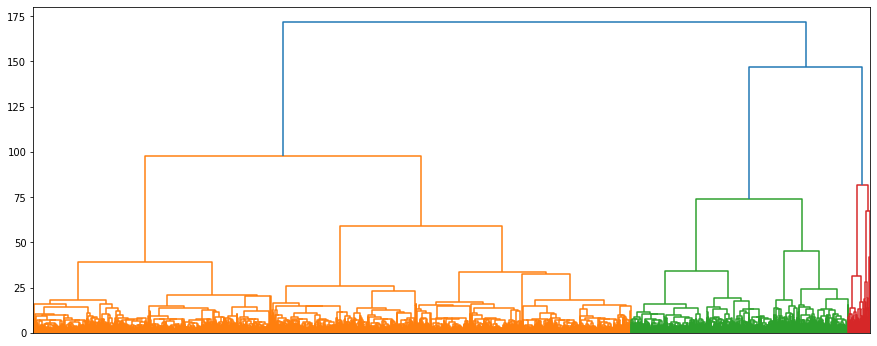

CPU times: user 8.72 s, sys: 254 ms, total: 8.98 s
Wall time: 8.99 s


In [31]:
%%time
#Matriz de distancias para dataframe completo
gym_linkage = linkage(gym, method='centroid')

# Dendrograma del dataframe
plt.figure(figsize=(15,6))
dendrogram(gym_linkage)
plt.xticks([]) #Eliminamos las etiquetas del eje x
plt.show()

Ahora, graficamos los datos de la matriz de características:

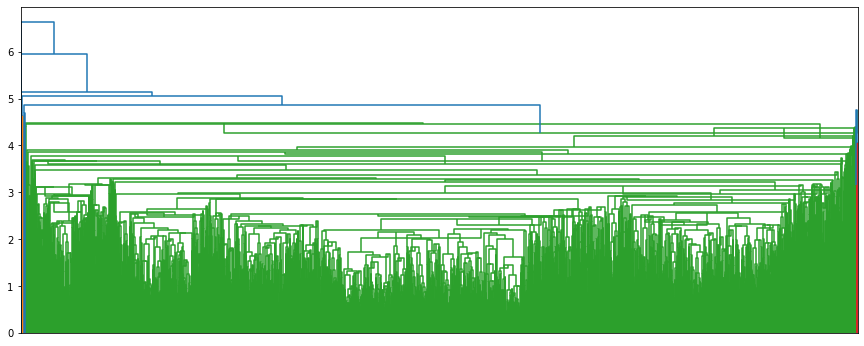

CPU times: user 6.52 s, sys: 207 ms, total: 6.72 s
Wall time: 6.74 s


In [32]:
%%time
# Dendrograma
plt.figure(figsize=(15,6))
dendrogram(data_linkage)
plt.xticks([]) #Eliminamos las etiquetas del eje x
plt.show()

De acuerdo a lo observado en los gráficos, estimaremos 5 clústeres de usuarios para entrenar un modelo de clustering.

### Clustering con K-means

Entrenaremos el modelo con el algoritmo KMeans para predecir los clústeres de clientes:

In [33]:
# Creamos un objeto KMeans con 5 clústeres
kmeans = KMeans(n_clusters=5, random_state=200, n_init=10)

# Aplicamos el modelo
kmeans.fit(X_train_st)

KMeans(n_clusters=5, random_state=200)

#### Valores medios de las características

Para ver los valores medios de las características en los distintos clústeres, crearemos un dataframe con las columnas de cada característica:

In [34]:
# Creamos un dataframe de los centroides de cada clúster de usuarios
centroids_df = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X_train.columns)

# Reseteamos índice y generamos una columna que tenga el número de grupo
centroids_df.reset_index(inplace=True)

# Cambiamos el nombre de la columna
centroids_df = centroids_df.rename(columns={'index':'centroid'})

In [35]:
# Transformamos el dataframe para poder graficarlo
centroids_df_melt = centroids_df.melt(
    id_vars= 'centroid',
    value_vars= X_train.columns,
    var_name= 'feature',
    value_name= 'feature_value')

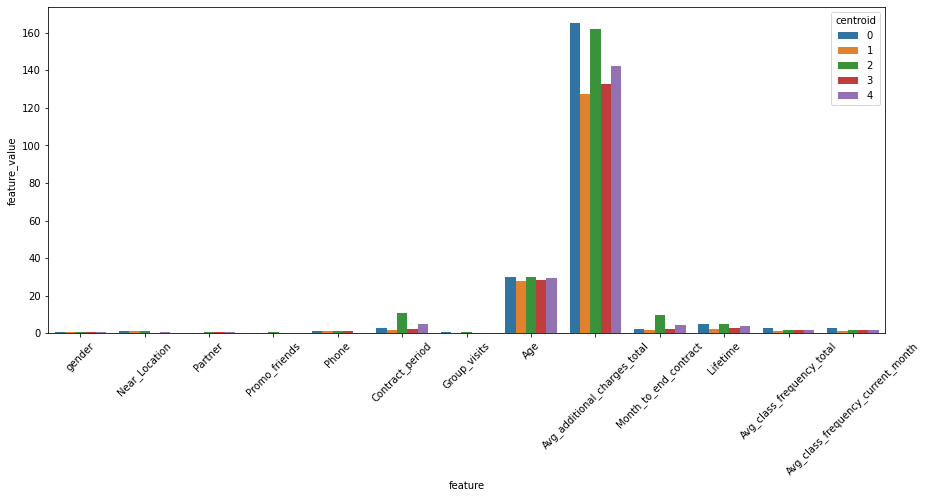

In [36]:
# Generamos un gráfico de barras para las características
plt.figure(figsize=(15,6))
sns.barplot(data=centroids_df_melt, x='feature', y='feature_value', hue='centroid')
plt.xticks(rotation=45)
plt.show()

Notaremos las características de *Age* y *Avg_additional_charges_total* por contener cifras más altas. Luego graficaremos las demás variables por separado para ver con mayor precisión sus diferencias.

- Los valores medios para la edad son bastante similares en los distintos clústeres, siendo levemente superior en el cluster 0 y 2.
- Respecto a los gastos adicionales se pueden ver mayores diferencias. El cluster 0 y 2 también presentan valores más altos y difieren casi en 20 al resto de clúster.
- La relación entre estas variables es similar, los clúster de mayor edad tienden a gastar más.

Veamos las otras características:

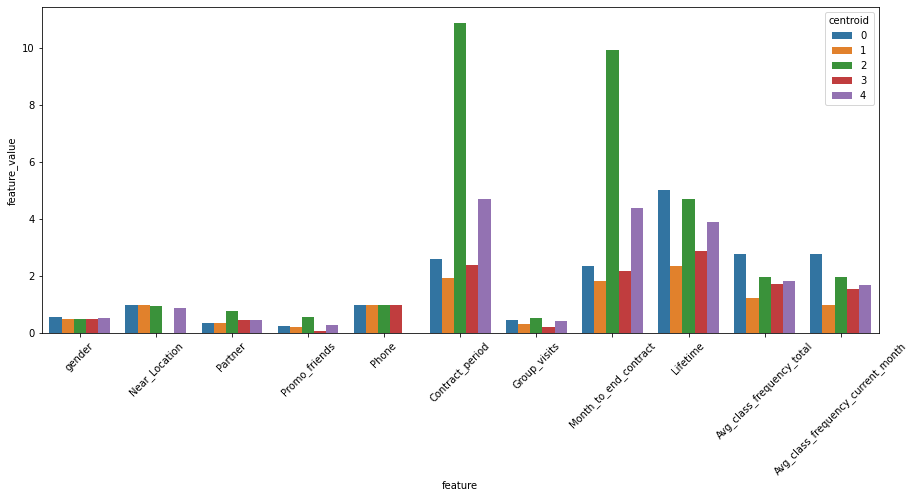

In [37]:
erased_features = ['Age', 'Avg_additional_charges_total']

# Generamos un gráfico de barras para las características
plt.figure(figsize=(15,6))
sns.barplot(data=centroids_df_melt.query('feature not in @erased_features'), x='feature', y='feature_value', hue='centroid')
plt.xticks(rotation=45)
plt.show()

- El género no presenta mayores diferencias de acuerdo a los clústeres.
- La locación presenta solo valores 0 para los usuarios del clúster 3, es decir, ninguno de ellos vive o trabaja en el vecindario donde se encuentra el gimnasio. Esto puede ser un sesgo importante para este clúster.
- El clúster 2 presenta más usuarios que pertenecen a compañías asociadas; para el resto, la distribución es similar.
- Respecto a la promoción de amigos, sucede un comportamiento similar donde el clúser 2 destaca y nuevamente el 3 tiene valores más cercanos a 0.
- De acuerdo a phone, la distribución es igual para todos los clústeres.
- El periodo de contrato y meses para finalizar el contrato presentan altos valores para el grupo 2.
- Las sesiones grupales no presentan mayores diferencias en sus valores medios entre los clústeres.
- El tiempo de vida en el gimnasio es superior para el clúster 0 y 2 pero no tan distante a los que tienen menos tiempo (solo dos meses de diferencia).
- La frecuencia de clases es mayor en el clúster 0 y para los otros la media se mantiene entre 1-2 sesiones por semana.


Respecto al total de medias para los distintos clústeres podemos notar que **tanto el 0 y 2 presentan valores medios más elevados** tanto en edad, como en gasto adicional. Esto es congruente con los valores medios más altos en los periodos de contrato, el tiempo de vida en el gimnasio y la frecuencia de visitas por semana.

#### Predicción y dataframe

In [38]:
# Creamos la predición para KMeans
kmean_preds = kmeans.predict(X_test_st)

In [39]:
# Creamos un dataframe con los valores estandarizados y los nombres de columnas
kmean_preds_df = pd.DataFrame(X_test_st, columns=X_train.columns).copy()
# Agregamos una columna con las predicciones
kmean_preds_df['cluster'] = kmean_preds
# Agregamos los valores de Churn para comparar
kmean_preds_df['churn'] = y_test.reset_index(drop=True)


# Mostramos la tabla
kmean_preds_df.head(10)

gender  Near_Location   Partner  Promo_friends     Phone  \
0  0.962575       0.422655  1.025962       1.498478  0.338518   
1  0.962575       0.422655  1.025962       1.498478  0.338518   
2  0.962575       0.422655 -0.974695      -0.667344  0.338518   
3 -1.038880       0.422655 -0.974695      -0.667344  0.338518   
4  0.962575       0.422655  1.025962       1.498478  0.338518   
5  0.962575       0.422655  1.025962       1.498478  0.338518   
6 -1.038880       0.422655 -0.974695       1.498478 -2.954055   
7 -1.038880       0.422655  1.025962      -0.667344  0.338518   
8  0.962575       0.422655 -0.974695      -0.667344 -2.954055   
9  0.962575      -2.365996  1.025962       1.498478  0.338518   

   Contract_period  Group_visits       Age  Avg_additional_charges_total  \
0         0.292131      1.193416 -0.363590                      1.701472   
1         0.292131     -0.837931  0.857600                      0.447769   
2        -0.806882     -0.837931 -1.890078                     -1.006856   
3         1.610947      1.193416  0.857600                      0.564219   
4         0.292131      1.193416  0.857600                     -0.815567   
5         1.610947      1.193416  1.162897                      0.754159   
6        -0.806882      1.193416  1.162897                      0.293157   
7         1.610947     -0.837931 -0.974185                     -0.781752   
8         1.610947      1.193416  1.773492                      0.698165   
9         0.292131      1.193416  1.773492                      0.025968   

   Month_to_end_contract  Lifetime  Avg_class_frequency_total  \
0               0.407170 -0.460500                   0.951519   
1               0.407170 -0.722799                   0.047213   
2              -0.789509 -0.722799                  -1.397183   
3               1.125177 -0.985099                   0.545285   
4               0.407170 -0.460500                  -0.860636   
5               1.843184 -0.198200                  -0.868940   
6              -0.789509 -0.460500                   0.592505   
7               1.364513 -0.722799                   1.227551   
8               1.843184  2.424796                  -1.357989   
9               0.407170  1.375597                   0.464519   

   Avg_class_frequency_current_month  cluster  churn  
0                           0.989749        2      0  
1                           0.001651        2      0  
2                          -1.642894        1      1  
3                           0.659110        2      0  
4                          -0.802331        2      0  
5                          -0.733340        2      0  
6                           0.712079        4      0  
7                           1.228493        2      0  
8                          -1.145265        4      0  
9                           0.544551        2      0

Podemos ver que queda nuestra columna de predicción de clústeres y el valor de churn correspondiente a cada usuario. Ahora veamos las tasas de cancelación medias para cada clúster y la distribución de las características.

#### Distribuciones de las características para los clúster

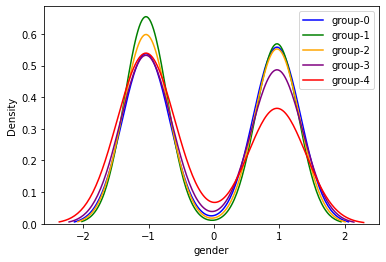

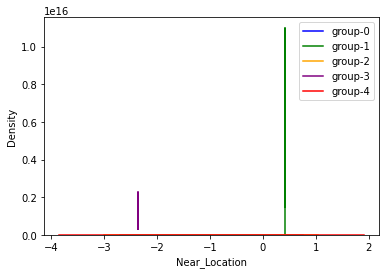

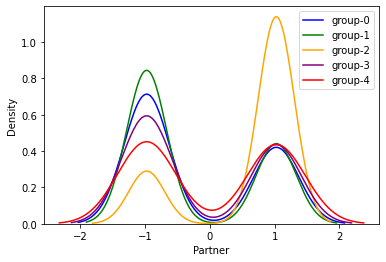

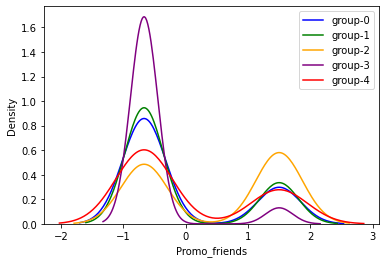

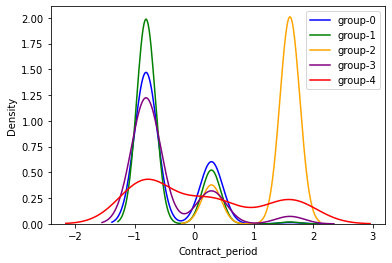

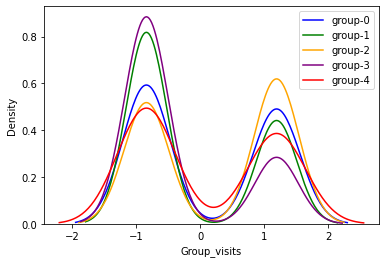

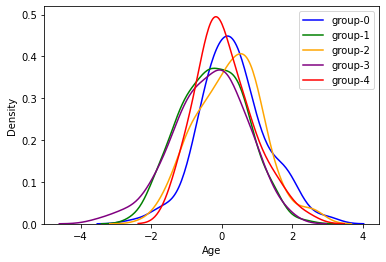

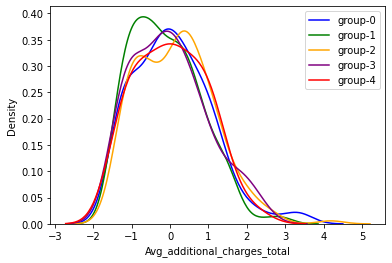

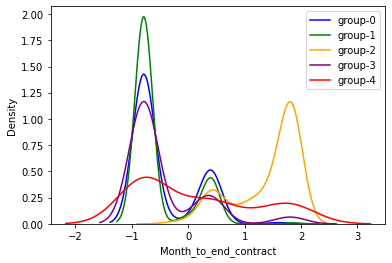

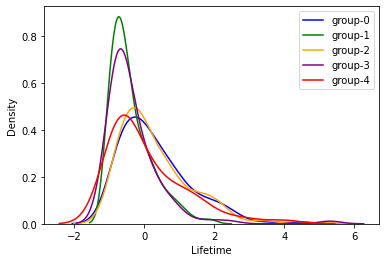

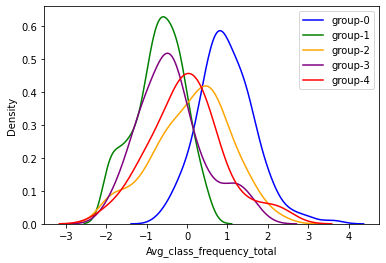

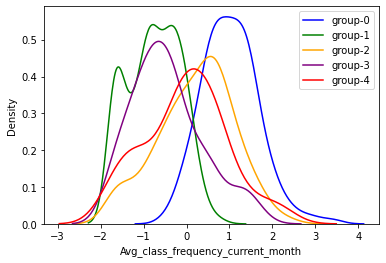

In [40]:
# Graficamos las distribuciones dependiendo de cada clúster
for col in X_train.columns.drop('Phone'): 
    #Graficamos todas a excepción de 'phone'. Su distribución genera problemas al graficar y no representa ser 
    #una variable determinante
    sns.kdeplot(kmean_preds_df[kmean_preds_df['cluster']==0][col], color='blue', label='group-0')
    sns.kdeplot(kmean_preds_df[kmean_preds_df['cluster']==1][col], color='green', label='group-1')
    sns.kdeplot(kmean_preds_df[kmean_preds_df['cluster']==2][col], color='orange', label='group-2')
    sns.kdeplot(kmean_preds_df[kmean_preds_df['cluster']==3][col], color='purple', label='group-3')
    sns.kdeplot(kmean_preds_df[kmean_preds_df['cluster']==4][col], color='red', label='group-4')
    plt.legend()
    plt.show()


**Conclusiones respecto a la distribución de los clústeres:**

- Respecto al género solo podemos concluir que la distribución es similar a excepción del clúster 4 donde la densidad es más baja para el valor True.
- La densidad es más alta para el grupo 1 de acuerdo a la cercanía con el gimnasio.
- La distribución es similar para los usuarios que pertenecen a compañias asociadas excepto por el grupo 2 que sobresale considerablemente.
- En la invitación de amigos, sobresale el grupo 3 para quienes no han llegado por invitación.
- El periodo de contrato muestra más diferencias en las densidades. Por un lado, el grupo 2 destaca por un mayor periodo de contrato.
- Las sesiones grupales presentan una distribución más armónica que las otras variables al igual que la edad y los gastos adicionales.
- El tiempo de vida en el gimnasio muestra una distribución similar para los clústeres, donde el grupo 1 y 3 presentan una mayor densidad.
- La frecuencia de visitas es más alta en el grupo 0 y más baja en el grupo 1 o 3.

#### Tasa de cancelación para cada clúster

In [41]:
# Agrupamos por cluster y calculamos el valor medio de la probabilidad de Churn
kmean_preds_df.groupby('cluster')['churn'].mean().sort_values()

cluster
2    0.029703
0    0.069182
4    0.280702
1    0.494465
3    0.522523
Name: churn, dtype: float64

Las tasas de cancelación son congruentes con algunas características observadas en los gráficos. 

- La tasa de **cancelación va a ser solo el 3% al 7% si el usuario pertenece al clúster 2 o 0.** Estos consideramos que son los grupos más leales.
- La cancelación umenta considerablemente para los otros clústeres, siendo **los más riesgosos el grupo 1 y 3** donde la tasa de cancelación aumenta al 50%; es decir, **la mitad de usuarios en estos grupos va a cancelar la suscripción.**

## Conclusiones y recomendaciones

Para enfrentar la pérdida de clientes hemos estudiado los datos de los usuarios del gimnasio Model Fitness.

De acuerdo a los modelos de predicción entrenados con los datos, el de **regresión logística** mostró ser más certero y adecuado para nuestro objetivo. **El modelo predice con una certeza del 81% si un usuario se va a retirar del gimnasio para el proximo mes.** Hemos estudiado las características para esto y algunas conclusiones que podemos sacar al respecto son las siguientes:

- El género no es relevante.
- La cercanía con el gimnasio es relevante.
- La retención de usuarios mejora cuando pertenecen a una compañía asociada, llegan por medio de un amigo o participan de actividades grupales en el gimnasio.
- Los usuarios sobre 30 años demuestran un mayor compromiso con el gimnasio.


A través de un modelo de clustering, se crearon 5 grupos de usuarios que presentan distintas características y posibilidades de salida. En ellos, se confirma que **quienes presenten mayor edad, una mayor duración de contrato y mayor frecuencia de visitas, corresponden a clientes más leales que no representan mayor riesgo de pérdida.** Además, tienen un mayor nivel de gastos adicionales.
Las tasas de **cancelación de estos grupos generalmente van entre el 3% y 7%.** Cuando los usuarios presentan otro comportamiento de acuerdo a las variables mencionadas, su tasa de cancelación puede aumentar entre el 28% al 50%.


**Recomendaciones:**

El grupo objetivo que se debe fidelizar para disminuír las salidas, es aquellas personas jovenes entre 25 y 30 años. En este tramo se presenta cierta variabilidad en el nivel de compromiso que es importante acompañar de incentivos para retener y potenciar las buenas conductas. Sobre los 25 años comienzan a mostrar una mayor estabilidad económica/emocional que se ve reflejada en el interés de participación y nivel de gasto. Algunas medidas adecuadas pueden ser:

- Incentivar la prolongación de contratos mediante descuentos o beneficios.

- Generar campañas de activación en universidades o empresas con usuarios jovenes y que sean cercanas, ofreciendo asociaciones y facilidades de pago.

- Generar un atractivo es crucial para los primeros meses; se puede ofrecer una mejor cartera de productos, variedad de clases grupales y facilidades de horarios.
